In [24]:
import pandas as pd
import numpy as np
from io import StringIO

In [25]:
#Carichiamo il dataset vini
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/wine/wine.data', header=None)
df_wine
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavonoids', 'Nonflavonoid phenols','Proanthocyanis', 'Color intensity',
                  'Hue', 'OD280/OD315 of diluited wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluited wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#preparazione del dataset
X, y= df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler() #calcola media e deviazione ed effettua la standardizzazione

In [30]:
X_train_std=sc.fit_transform(X_train)

In [31]:
X_test_std=sc.fit_transform(X_test)

In [32]:
from matplotlib.colors import ListedColormap

In [33]:
import matplotlib.pyplot as plt

In [36]:
def plot_decision_regions (X, y, classifier, resolution=0.02):
    #definizione marker e mappa dei colori
    markers= ('s', 'x', 'o', '^', 'v')
    colors= ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #disegno delle superfici decisionali
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict (np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #plot class sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.6, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
        

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

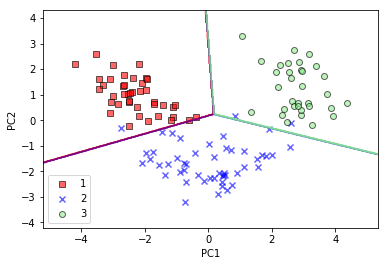

In [38]:
#Analisi delle componenti principali
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.fit_transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions (X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

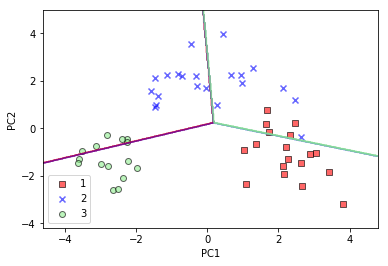

In [40]:
#con dati di test
plot_decision_regions (X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [41]:
#per vedere tutte le componenti
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


array([ 0.36951469,  0.18434927,  0.11815159,  0.07334252,  0.06422108,
        0.05051724,  0.03954654,  0.02643918,  0.02389319,  0.01629614,
        0.01380021,  0.01172226,  0.00820609])

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

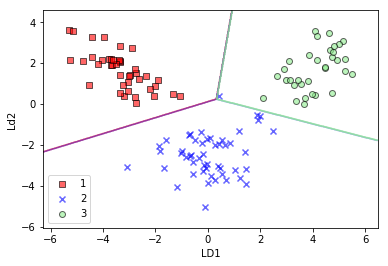

In [44]:
#LDA: Linear discriminant analysis
lda = LDA(n_components=2)
X_train_lda= lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
plot_decision_regions (X_train_lda, y_train, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('Ld2')
plt.legend(loc='lower left')
plt.show()

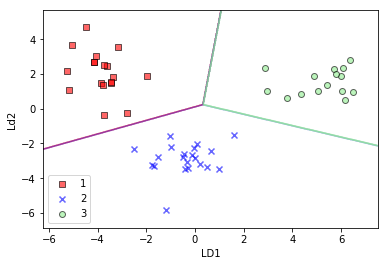

In [47]:
#con test
X_test_lda= lda.fit_transform(X_test_std, y_test)
plot_decision_regions (X_test_lda, y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('Ld2')
plt.legend(loc='lower left')
plt.show()